# **Customer Purchase Behavior Analysis using Descriptive Statistics**

## **Problem Statement**

### **Objective 🎯**



Our mission is to analyze the provided dataset containing customer information and purchasing behavior to make informed decisions with a  goal to identify patterns, trends, and correlations that will help the company optimize its marketing efforts and increase offer acceptance rates. 🎉

### **About the Dataset**

The description for the **various features of the dataset** is as follow:

1. **Response** (target) - 1 if customer accepted the offer in the last campaign, 0 otherwise
1. **ID** - Unique ID of each customer
1. **Year_Birth** - Age of the customer
1. **Complain** - 1 if the customer complained in the last 2 years
1. **Dt_Customer** - date of customer's enrollment with the company
1. **Education** - customer's level of education
1. **Marital** - customer's marital status
1. **Kidhome** - number of small children in customer's household
1. **Teenhome** - number of teenagers in customer's household
1. **Income** - customer's yearly household income
1. **MntFishProducts** - the amount spent on fish products in the last 2 years
1. **MntMeatProducts** - the amount spent on meat products in the last 2 years
1. **MntFruits** - the amount spent on fruits products in the last 2 years
1. **MntSweetProducts** - amount spent on sweet products in the last 2 years
1. **MntWines** - the amount spent on wine products in the last 2 years
1. **MntGoldProds** - the amount spent on gold products in the last 2 years
1. **NumDealsPurchases** - number of purchases made with discount
1. **NumCatalogPurchases** - number of purchases made using catalog (buying goods to be shipped through the mail)
1. **NumStorePurchases** - number of purchases made directly in stores
1. **NumWebPurchases** - number of purchases made through the company's website
1. **NumWebVisitsMonth** - number of visits to company's website in the last month
1. **Recency** - number of days since the last purchase


##**Task 1 - Basic CleanUp**

### **Import libraries & Load the dataset for analysis**

In [ ]:
#Data visulisation and manipulation library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from tabulate import tabulate

# For supressing down the warnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)


In [ ]:
# Mounting Google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Loading the Dataset
store = pd.read_csv("/content/drive/MyDrive/Datasets/Superstore Marketing Data.csv")

In [ ]:
# Adjust the display option
pd.set_option('display.max_columns', None)  # Show all columns
pd.set_option('display.max_rows', None)  # Show all rows
pd.set_option('display.width', 1000)  # Increase display width
pd.set_option('display.max_colwidth', 1000)  # Increase column width

In [ ]:
#creating a shallow copy of the dataset
#This is done so that the original dataset remains intact
#We will perform all analysis on this shallow copy

store_df=store.copy()

In [ ]:
#dataset first veiw
store_df

In [ ]:
#head funtion returns the first 5 rows of data
store_df.head()

,Id,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain
0,1826,1970,Graduation,Divorced,84835.0,0,0,6/16/2014,0,189,104,379,111,189,218,1,4,4,6,1,1,0
1,1,1961,Graduation,Single,57091.0,0,0,6/15/2014,0,464,5,64,7,0,37,1,7,3,7,5,1,0
2,10476,1958,Graduation,Married,67267.0,0,1,5/13/2014,0,134,11,59,15,2,30,1,3,2,5,2,0,0
3,1386,1967,Graduation,Together,32474.0,1,1,########,0,10,0,1,0,0,0,1,1,0,2,7,0,0
4,5371,1989,Graduation,Single,21474.0,1,0,########,0,6,16,24,11,0,34,2,3,1,2,7,1,0


In [ ]:
#Tail funtion returns the last 5 rows of data
store_df.tail()

,Id,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain
2235,10142,1976,PhD,Divorced,66476.0,0,1,########,99,372,18,126,47,48,78,2,5,2,11,4,0,0
2236,5263,1977,2n Cycle,Married,31056.0,1,0,1/22/2013,99,5,10,13,3,8,16,1,1,0,3,8,0,0
2237,22,1976,Graduation,Divorced,46310.0,1,0,########,99,185,2,88,15,5,14,2,6,1,5,8,0,0
2238,528,1978,Graduation,Married,65819.0,0,0,11/29/2012,99,267,38,701,149,165,63,1,5,4,10,3,0,0
2239,4070,1969,PhD,Married,94871.0,0,2,########,99,169,24,553,188,0,144,1,8,5,4,7,1,0


### **Dataset row and column count**

In [ ]:
# Column of the dataset
store_df.columns



Index(['Id', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome', 'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'Response', 'Complain'], dtype='object')

In [ ]:
#Shape method returns the dimension of dataframe

a=store_df.shape
print(f"No of rows in the superstore dataset: {a[0]}")
print(f"No of columns in the superstore dataset : {a[1]}")

No of rows in the superstore dataset: 2240
No of columns in the superstore dataset : 22


### **Dataset Information**

In [ ]:
# info() method prints information about a DataFrame
#including the index and dtype of columns,
#non-null values and memory usage

store_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Id                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

The **.info() method** on the dataframe reveals that :

*   Only the **income column** have the **NULL value .**
*   The Dtype of the **Dt_Customer** column should be of **Datetime format** instead of object type.



### **Duplicate Values**

In [ ]:
#Number of duplicate column in the datatset
No_of_duplicates =store_df.duplicated().sum()
print(f"Number of duplicates in the dataset: {No_of_duplicates}")

It shows that there is **no duplicate value in the dastset.**

### **Missing Values/Null Values**

In [ ]:
#Finding missing / NUll value in the dataset
store_df.isnull().sum()


,0
Id,0
Year_Birth,0
Education,0
Marital_Status,0
Income,24
Kidhome,0
Teenhome,0
Dt_Customer,0
Recency,0
MntWines,0


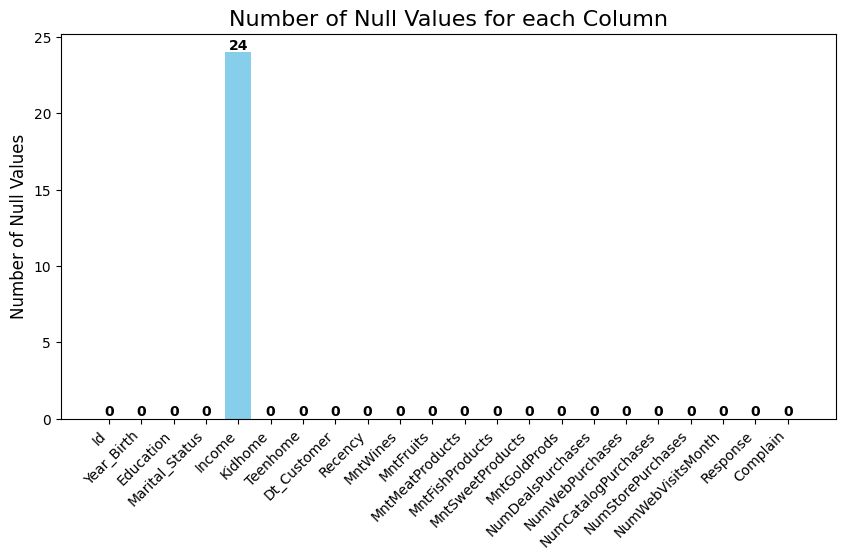

In [ ]:
# Compute the count of missing values per column
missing_values = store_df.isnull().sum()

# Create the bar chart

plt.figure(figsize=(10, 5))  # Set figure size
bars= plt.bar(missing_values.index, missing_values.values, color='skyblue')

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height, str(height),
             ha='center', va='bottom', fontsize=10, fontweight='bold')

# Customize the plot
plt.ylabel("Number of Null Values", fontsize=12)  # Y-axis label
plt.title("Number of Null Values for each Column", fontsize=16)  # Title

# Rotate x-axis labels for better visibility
plt.xticks(rotation=45, ha='right')


# Show the plot
plt.show()


So, there is a total of **24 missing values in the Income column**.

### **Number of Unique value per column**

In [ ]:
# Number of unique value in each columns

unique_counts = store_df.nunique().reset_index()
unique_counts.columns = ['Column Name', 'Unique Values']
unique_counts

,Column Name,Unique Values
0,Id,2240
1,Year_Birth,59
2,Education,5
3,Marital_Status,8
4,Income,1974
5,Kidhome,3
6,Teenhome,3
7,Dt_Customer,401
8,Recency,100
9,MntWines,776


### **Dataset Statistical Description**

In [ ]:
# let's describe our data
store_df.describe(include='all').transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Id,2240.0,NaN,NaN,NaN,5592.159821,3246.662198,0.0,2828.25,5458.5,8427.75,11191.0
Year_Birth,2240.0,NaN,NaN,NaN,1968.805804,11.984069,1893.0,1959.0,1970.0,1977.0,1996.0
Education,2240,5,Graduation,1127,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Marital_Status,2240,8,Married,864,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Income,2216.0,NaN,NaN,NaN,52247.251354,25173.076661,1730.0,35303.0,51381.5,68522.0,666666.0
Kidhome,2240.0,NaN,NaN,NaN,0.444196,0.538398,0.0,0.0,0.0,1.0,2.0
Teenhome,2240.0,NaN,NaN,NaN,0.50625,0.544538,0.0,0.0,0.0,1.0,2.0
Dt_Customer,2240,401,########,916,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Recency,2240.0,NaN,NaN,NaN,49.109375,28.962453,0.0,24.0,49.0,74.0,99.0
MntWines,2240.0,NaN,NaN,NaN,303.935714,336.597393,0.0,23.75,173.5,504.25,1493.0


**Some of the columns have abrupt values** representing a **wide gap between 75th percentile and maximum value**. These wide gap can be a **source of potential outlier** in the dataset. Those columns include :


*   **Income**
*   **Year_Birth**
*   **MntWines**
*   **MntMeatProducts**
*   **MntFishProducts**
*   **MntSweetProducts**
*   **MntGoldProds**








### **Distribution of customer demographics(Age, Education & marital status)**

#### **Birth Year of Customer**

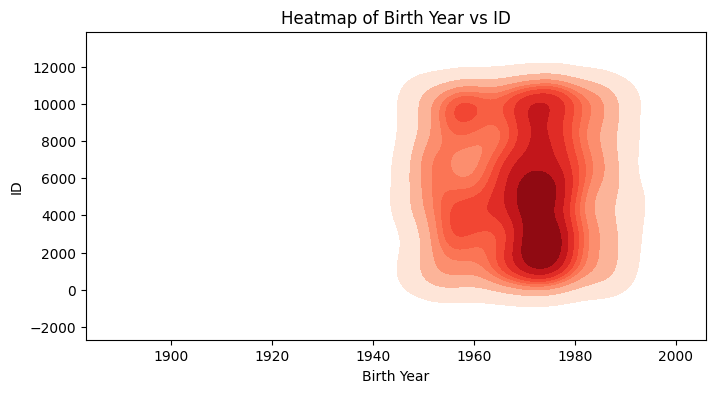

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 4))

# Generate a heatmap (density plot) for Income vs Total Amount
sns.kdeplot(x=store_df['Year_Birth'],y=store_df['Id'], cmap="Reds", fill=True)

plt.xlabel("Birth Year")
plt.ylabel("ID")
plt.title("Heatmap of Birth Year vs ID")

plt.show()



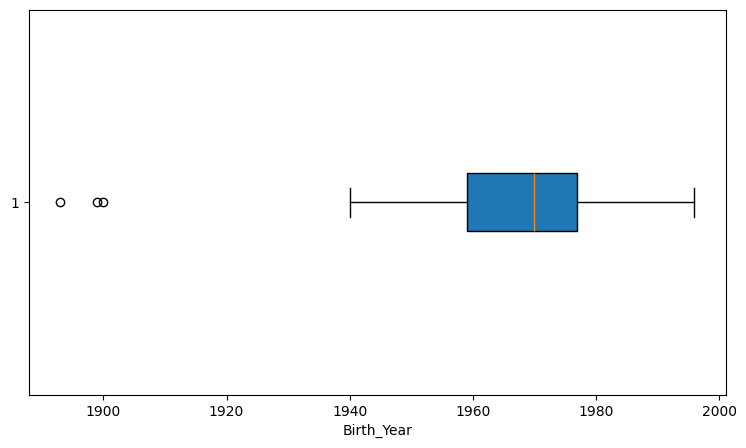

In [ ]:
#Boxplot for Birth year to know potential outliers

plt.figure(figsize=(9,5))
plt.boxplot(store_df['Year_Birth'],vert=False,patch_artist=True)
plt.xlabel("Birth_Year")
plt.show()

In [ ]:
#Creating a boolean mask for identifying potential outlier in birth year
store_df[store_df["Year_Birth"]<1940]

,Id,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain
513,11004,1893,2n Cycle,Single,60182.0,0,1,5/17/2014,23,8,0,5,7,0,2,1,1,0,2,4,0,0
827,1150,1899,PhD,Together,83532.0,0,0,9/26/2013,36,755,144,562,104,64,224,1,4,6,4,1,0,0
2233,7829,1900,2n Cycle,Divorced,36640.0,1,0,9/26/2013,99,15,6,8,7,4,25,1,2,1,2,5,0,1


Thus, the above two plot represents that the **most of the birth year of the customer is concentrated between year (1960-1990)**. There is a significant time gap between (1900-1940) and hence they **seems to be a potential outliers with values (1893,1899 & 1900)**.

#### **Cross Tabulation between eduaction & marital status**

In [ ]:
cross_tab = pd.crosstab(store_df['Education'], store_df['Marital_Status'])
cross_tab

Marital_Status,Absurd,Alone,Divorced,Married,Single,Together,Widow,YOLO
Education,,,,,,,,
2n Cycle,0,0,23,81,37,57,5,0
Basic,0,0,1,20,18,14,1,0
Graduation,1,1,119,433,252,286,35,0
Master,1,1,37,138,75,106,12,0
PhD,0,1,52,192,98,117,24,2


#### **Education Status of Customer**

In [ ]:
education_df=store_df.groupby("Education").size().sort_values(ascending=False).reset_index(name="Number of Individuals")
education_df

,Education,Number of Individuals
0,Graduation,1127
1,PhD,486
2,Master,370
3,2n Cycle,203
4,Basic,54


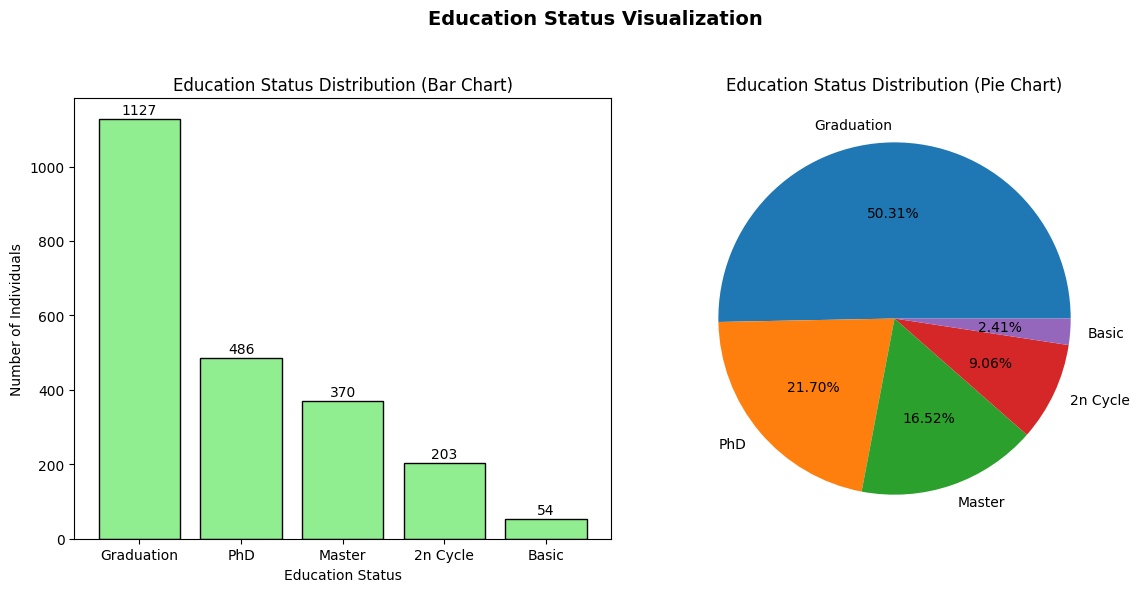

In [ ]:
import matplotlib.pyplot as plt

# Setting up the figure and subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))  # 1 row, 2 columns

# Bar chart
axes[0].bar(education_df["Education"], education_df["Number of Individuals"], color='lightgreen', edgecolor='black')

# Adding labels and title for bar chart
axes[0].set_title('Education Status Distribution (Bar Chart)')
axes[0].set_xlabel('Education Status')
axes[0].set_ylabel('Number of Individuals')

# Adding corresponding values to the top of bars
for i, value in enumerate(education_df["Number of Individuals"]):
    axes[0].text(i, value + 5, str(value), ha='center', va='bottom')

# Pie chart
axes[1].pie(education_df['Number of Individuals'], labels=education_df['Education'], autopct='%2.2f%%')

# Title for pie chart
axes[1].set_title('Education Status Distribution (Pie Chart)')

# Common title for the entire figure
fig.suptitle('Education Status Visualization', fontsize=14, fontweight='bold')

# Adjust layout
plt.tight_layout(rect=[0, 0, 1, 0.95])  # Ensure spacing and reserve space for the title

# Show the plot
plt.show()


The above analysis shows that **most of the customer base is literate** . Among the entire customer **majority of the customers are graduates(~50%)** followed by **Phd holders ( ~22% ).**

#### **Marital Status of Customer**

In [ ]:
marital_df=store_df.groupby("Marital_Status").size().sort_values(ascending=False).reset_index(name="Number of Individuals")
marital_df

,Marital_Status,Number of Individuals
0,Married,864
1,Together,580
2,Single,480
3,Divorced,232
4,Widow,77
5,Alone,3
6,Absurd,2
7,YOLO,2


In [ ]:
# Combing the least majority status(yolo, Absurd & Alone) as others

marital_df["Marital_Status"] = marital_df["Marital_Status"].replace([ "Alone", "Absurd", "YOLO"], "Others")
marital_status_df= marital_df.groupby("Marital_Status").sum().sort_values(by="Number of Individuals",ascending=False).reset_index()
marital_status_df

,Marital_Status,Number of Individuals
0,Married,864
1,Together,580
2,Single,480
3,Divorced,232
4,Widow,77
5,Others,7


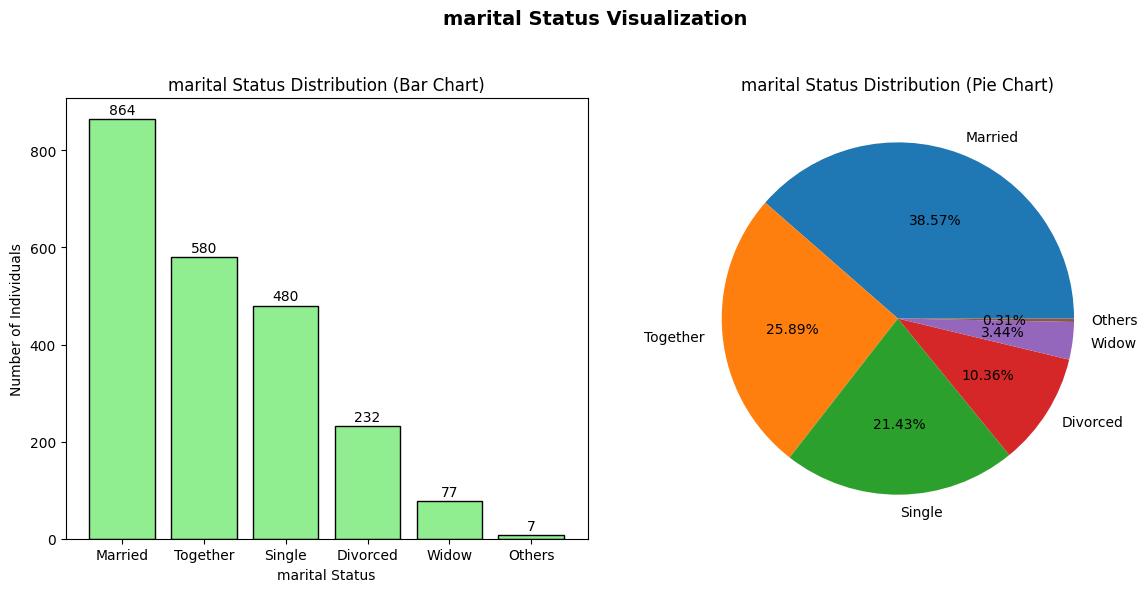

In [ ]:


# Setting up the figure and subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))  # 1 row, 2 columns

# Bar chart
axes[0].bar(marital_status_df["Marital_Status"], marital_status_df["Number of Individuals"], color='lightgreen', edgecolor='black')

# Adding labels and title for bar chart
axes[0].set_title('marital Status Distribution (Bar Chart)')
axes[0].set_xlabel('marital Status')
axes[0].set_ylabel('Number of Individuals')

# Adding corresponding values to the top of bars
for i, value in enumerate(marital_status_df["Number of Individuals"]):
    axes[0].text(i, value + 5, str(value), ha='center', va='bottom')

# Pie chart
axes[1].pie(marital_status_df['Number of Individuals'], labels=marital_status_df['Marital_Status'], autopct='%2.2f%%')

# Title for pie chart
axes[1].set_title('marital Status Distribution (Pie Chart)')

# Common title for the entire figure
fig.suptitle('marital Status Visualization', fontsize=14, fontweight='bold')

# Adjust layout
plt.tight_layout(rect=[0, 0, 1, 0.95])  # Ensure spacing and reserve space for the title

# Show the plot
plt.show()


The above two plots shows that the **married customer constitute the majority of our customer base (~39%)** followed by customer with relationship status as **together(~26%)** and **single ( ~22%)**.

### **Ensuring Consistent Data type & Imputation method Employed**

#### **Consistent Data type**

In [ ]:
# To print the data type of Dt_Customer column
print(store_df["Dt_Customer"].dtype)

object


In [ ]:
# Checking all the unique Value in the Dt_Customer column
store_df["Dt_Customer"].unique()

array(['6/16/2014', '6/15/2014', '5/13/2014', '########', '3/17/2014',
       '1/29/2014', '1/18/2014', '12/27/2013', '10/16/2013', '7/23/2013',
       '5/28/2013', '3/26/2013', '3/15/2013', '11/23/2012', '10/13/2012',
       '9/14/2012', '6/29/2014', '5/31/2014', '5/30/2014', '4/27/2014',
       '10/29/2013', '4/25/2013', '4/20/2013', '3/30/2013', '2/14/2013',
       '12/19/2012', '12/15/2012', '9/17/2012', '4/28/2014', '3/29/2014',
       '11/15/2013', '9/20/2013', '8/31/2013', '7/30/2013', '7/27/2013',
       '6/22/2013', '11/21/2012', '9/28/2012', '9/27/2012', '8/13/2012',
       '6/25/2014', '5/28/2014', '4/14/2014', '2/27/2014', '1/28/2014',
       '11/17/2013', '10/17/2013', '10/13/2013', '9/30/2013', '5/29/2013',
       '4/29/2013', '10/18/2012', '8/26/2012', '5/23/2014', '5/17/2014',
       '4/21/2014', '3/23/2014', '12/16/2013', '11/26/2013', '11/14/2013',
       '9/27/2013', '9/18/2013', '7/18/2013', '5/27/2013', '2/20/2013',
       '12/24/2012', '11/19/2012', '3/28/2014', '

In [ ]:
# Converting the datatype of the Dt_Customer column
store_df["Dt_Customer"] = pd.to_datetime(store_df["Dt_Customer"], format="%m/%d/%Y", errors="coerce")

In [ ]:
# Printing the updated datatype
print(store_df['Dt_Customer'].dtype)

datetime64[ns]


#### **Handle Null value & Imputaion method**

In [ ]:
Total_Null_value= store_df["Income"].isnull().sum()
print(f"Total Null value in the Income column: {Total_Null_value}")

Total Null value in the Income column: 24


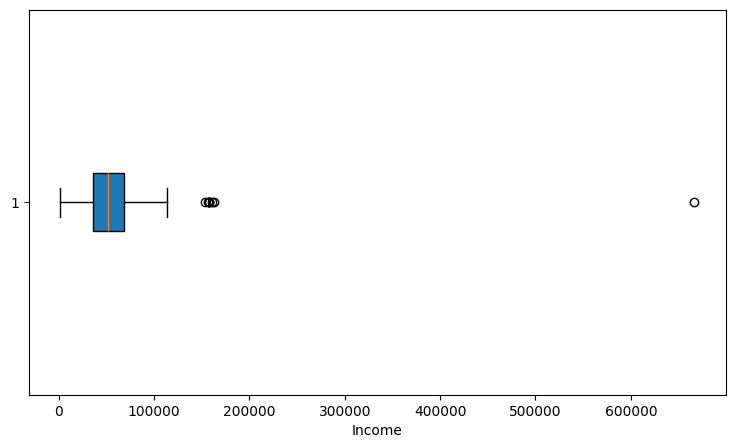

In [ ]:
# Box plot for income column to know about skewness of data
plt.figure(figsize=(9,5))
plt.boxplot(store_df['Income'],vert=False,patch_artist=True)
plt.xlabel("Income")
plt.show()

The above box plot represents that the **maximum income (666,666) is significantly higher than the 75th percentile (68,522)**.This leads to a presence of **potential outliers** as the  the **mean is heavily influenced by extreme values** leading to a right-skewed distribution for income column .Thus **due to the skewed distribution and presence of extreme values, median imputation is the most appropriate method**.

In [ ]:
#Imputing the Income column with median value
store_df["Income"].fillna(store_df["Income"].median(), inplace=True)

In [ ]:
# Count of null value after Imputation
store_df["Income"].isnull().sum()

0

## **Task 2 - Descriptive Statistics**

### **Statistical value for Numerical column**

In [ ]:
# Selecting only the numerical columns
numerical_column = store_df.select_dtypes(include=['int64', 'float64'])
numerical_column.columns

Index(['Id', 'Year_Birth', 'Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'Response', 'Complain'], dtype='object')

In [ ]:
#Summary table representing Basic statistics for Numerical columns

statistics_df = numerical_column.agg(["mean","median",lambda x: x.mode().iloc[0],"std","var"])  # Since mode() returns multiple values, we take the first mode value using .iloc[0].
statistics_df.index = ["Mean", "Median", "Mode", "Std", "Variance"]  # .index used to rename the column
statistics_df.transpose()

,Mean,Median,Mode,Std,Variance
Id,5592.159821,5458.5,0.0,3246.662198,1.054082e+07
Year_Birth,1968.805804,1970.0,1976.0,11.984069,1.436179e+02
Income,52237.975446,51381.5,51381.5,25037.955891,6.268992e+08
Kidhome,0.444196,0.0,0.0,0.538398,2.898725e-01
Teenhome,0.506250,0.0,0.0,0.544538,2.965219e-01
Recency,49.109375,49.0,56.0,28.962453,8.388237e+02
MntWines,303.935714,173.5,2.0,336.597393,1.132978e+05
MntFruits,26.302232,8.0,0.0,39.773434,1.581926e+03
MntMeatProducts,166.950000,67.0,7.0,225.715373,5.094743e+04
MntFishProducts,37.525446,12.0,0.0,54.628979,2.984325e+03


In [ ]:
# Calculate Measures of Central Tendency
# mean_values = numerical_column.mean()
# median_values = numerical_column.median()
# mode_values = numerical_column.mode().iloc[0]  # Mode might return multiple values, so take the first one

# # Calculate Measures of Dispersion
# variance_values = numerical_column.var()
# std_dev_values = numerical_column.std()

# # Combine results into a DataFrame
# statistics_df = pd.DataFrame({
#     "Mean": mean_values,
#     "Median": median_values,
#     "Mode": mode_values,
#     "Standard Deviation": std_dev_values,
#     "Variance": variance_values
# })

# # Display the statistics value of Numerical column
# statistics_df


### **Identification & Handling of Outliers**

In [ ]:
# List of Numerical columns
numerical_column.columns

Index(['Id', 'Year_Birth', 'Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'Response', 'Complain'], dtype='object')

In [ ]:
# Number of Numerical column
len(numerical_column.columns)

19

In [ ]:
#Dropping the Binary valued(Discrete valued) numerical columns
numerical_column.drop(columns=["Id" ,"Response" ,"Complain"],inplace=True)

In [ ]:
numerical_column.columns

Index(['Year_Birth', 'Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth'], dtype='object')

In [ ]:
# Number of columns after dropping Binary columns
len(numerical_column.columns)

16

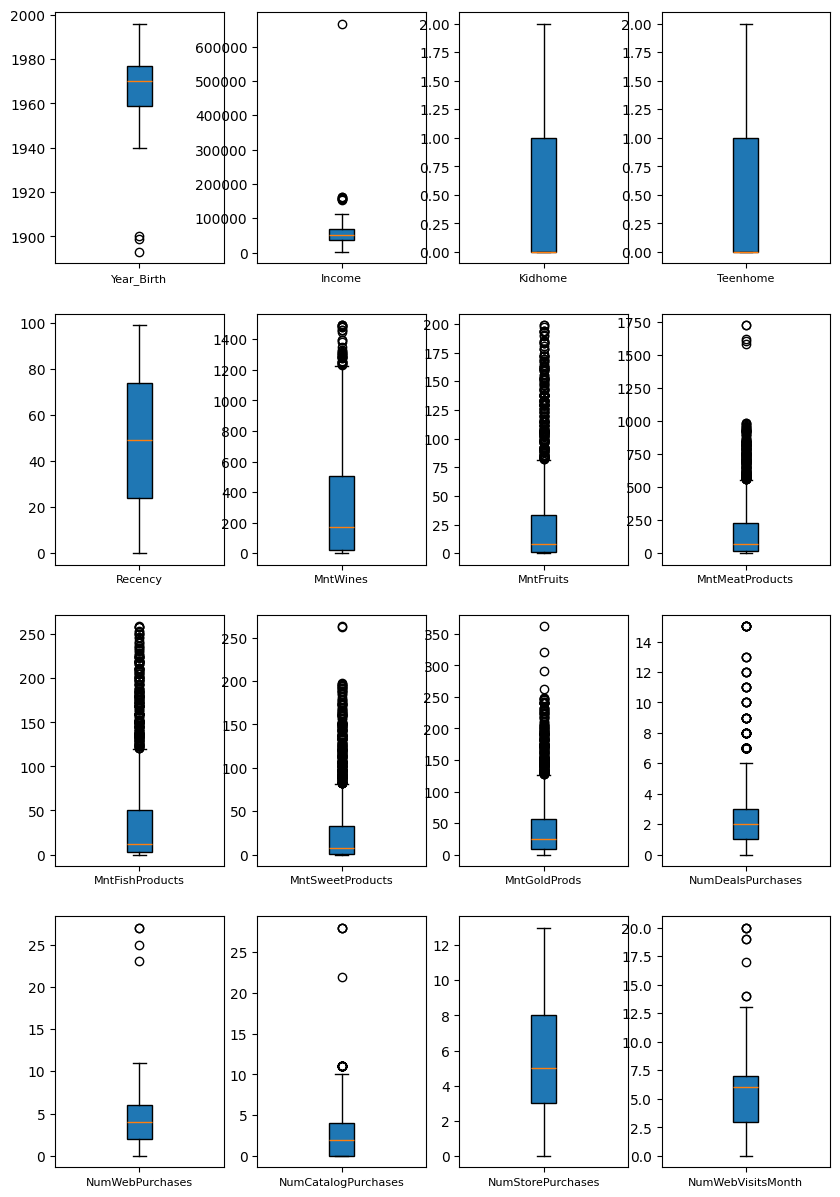

In [ ]:
# Creating a BoxPlot to show the potential Outliers by iterating over numerical column of the datatset

nrows = 4
ncols = 4
fig,axes = plt.subplots(nrows,ncols,figsize=(10,15))

axes = axes.flatten()

for i,column in enumerate(numerical_column.columns):
  #sns.boxplot(y=store_df[column],ax=axes[i],color="lightgreen")
  axes[i].boxplot(numerical_column[column],vert=True,patch_artist=True)
  #axes[i].set_title(column)  # Set title as column name
  axes[i].set_xticklabels([column], fontsize=8, rotation=0)


# Hide unused subplots if dataset has fewer than nrows*ncols columns
# for j in range(i + 1, len(axes)):
#     fig.delaxes(axes[j])

plt.show()

The box plot of all numerical column shows that **some of the columns have abrupt outlier value**. So, based on the result of the boxplot we will be **dropping those far distant  outliers that could potentially affect our analysis** .

In [ ]:
# Shape of the numerical_column before dropping distant outliers
numerical_column.shape

(2240, 16)

In [ ]:
# Handling Distant Outlier Values

numerical_column.drop(numerical_column.index[numerical_column.Year_Birth <= 1900], inplace=True)
numerical_column.drop(numerical_column.index[numerical_column.Income > 300000], inplace=True)
numerical_column.drop(numerical_column.index[numerical_column.MntMeatProducts > 1200], inplace=True)
numerical_column.drop(numerical_column.index[numerical_column.MntSweetProducts > 240], inplace=True)
numerical_column.drop(numerical_column.index[numerical_column.MntGoldProds > 270], inplace=True)
numerical_column.drop(numerical_column.index[numerical_column.NumWebPurchases > 20], inplace=True)
numerical_column.drop(numerical_column.index[numerical_column.NumCatalogPurchases > 20], inplace=True)


In [ ]:
# Shape of the numerical_column after dropping distant value outliers
numerical_column.shape

(2227, 16)

## **Task 3 - Probability Distributions & Expected Value [ E(x) ]**

### **Probability Distribution**

In [ ]:
#selecting only the numerical columns with continuous value as done before in Task 2

numerical_column.columns

Index(['Year_Birth', 'Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth'], dtype='object')

In [ ]:
# Taking a list of probable distribution function for the columns
Distributions = [stats.norm ,
                 stats.lognorm ,
                 stats.expon ,
                 stats.gamma ,
                 stats.beta ,
                 stats.weibull_min]

In [ ]:
import warnings
warnings.simplefilter(action='ignore', category=RuntimeWarning)

# Creating a empty dictionary to store the best fit distribution along with its P_value
best_fit_data= {}

#Looping through the numerical columns
for column in numerical_column:
  column_value = store_df[column].dropna()  # .dropna() to drop NaN value from that column
  best_fit_distribution  = None
  best_p_value = 0         # should be as small as possible
  #best_ks = float("inf")  # Initialize best KS statistic to maximum upto infinity if compared using KS_value



# Looping through the distribution
  for distribution in Distributions:
    try:
      args = distribution.fit(column_value)

      ks_stat , p_value = stats.kstest (column_value , distribution.name , args= args)

      if p_value > best_p_value:  # when compared using p_value
        #ks_stat < best_ks        # when compared using ks_value
        best_p_value = p_value    # Reassigning the best p_value on every iterations
        best_fit_distribution = distribution # Reassigning the best_fit_distribution on every iterations



    except exception:
      continue


    # assigning value to empty dict with column as the key vlaue
    best_fit_data[column] = (best_fit_distribution.name , best_p_value )


In [ ]:
# Create a list to store table data
column_values = []

for col, (dist, pvalue) in best_fit_data.items():
    column_values.append([col, dist, pvalue])  # Append as a list

# Print table using tabulate
print(tabulate(column_values, headers=["Column", "Best Fit", "p-value"], tablefmt="grid"))


+---------------------+-------------+--------------+
| Column              | Best Fit    |      p-value |
+=====================+=============+==============+
| Year_Birth          | weibull_min | 1.38799e-05  |
+---------------------+-------------+--------------+
| Income              | beta        | 2.32799e-05  |
+---------------------+-------------+--------------+
| Kidhome             | norm        | 1.18103e-279 |
+---------------------+-------------+--------------+
| Teenhome            | norm        | 1.22787e-232 |
+---------------------+-------------+--------------+
| Recency             | beta        | 0.0073389    |
+---------------------+-------------+--------------+
| MntWines            | weibull_min | 6.00853e-13  |
+---------------------+-------------+--------------+
| MntFruits           | beta        | 5.83072e-63  |
+---------------------+-------------+--------------+
| MntMeatProducts     | lognorm     | 9.81195e-07  |
+---------------------+-------------+---------

### **Expected Value [E(x)]**

In [ ]:
# Import necessary libraries
import warnings
warnings.simplefilter(action='ignore', category=RuntimeWarning)
from tabulate import tabulate


#Creating a empty list to store column name and its expected value
best_fits = []

for column in numerical_column:
    new_column_value = store_df[column].fillna(store_df[column].median())  # Handle missing values
    best_distribution = None
    best_p_value = 0
    expected_value = np.nan  # Initialize expected value as NaN

    for distribution in Distributions:
        try:
            # Fit distribution and get parameters
            args = distribution.fit(new_column_value)
            _, p_value = stats.kstest(new_column_value, distribution.name, args=args)

            if p_value > best_p_value:
                best_p_value = p_value
                best_distribution = distribution

                # Compute expected value safely
                mean_value = distribution.mean(*args)

                # Check for valid mean (avoid inf, NaN, or extremely large values)
                if np.isfinite(mean_value) and abs(mean_value) < 1e6:
                    expected_value = round(mean_value,2)
                else:
                    expected_value = np.nan  # Set NaN if value is invalid

        except Exception :
            continue  # Skip problematic distributions

    best_fits.append((column, round(expected_value,2) if np.isfinite(expected_value) else "Invalid Mean"))

# Print results in table format
print(tabulate(best_fits, headers=["Column", "Expected Value [E(x)]"], tablefmt="grid"))


+---------------------+-------------------------+
| Column              |   Expected Value [E(x)] |
+=====================+=========================+
| Year_Birth          |                 1968.73 |
+---------------------+-------------------------+
| Income              |                52377.3  |
+---------------------+-------------------------+
| Kidhome             |                    0.44 |
+---------------------+-------------------------+
| Teenhome            |                    0.51 |
+---------------------+-------------------------+
| Recency             |                   50.57 |
+---------------------+-------------------------+
| MntWines            |                  349.22 |
+---------------------+-------------------------+
| MntFruits           |                   41.37 |
+---------------------+-------------------------+
| MntMeatProducts     |                  220.88 |
+---------------------+-------------------------+
| MntFishProducts     |                   49.68 |


## **Task 4: Insights and Customer Segmentation**

### Correlation & Heatmap

In [ ]:
store_df[numerical_column.columns].corr()

,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth
Year_Birth,1.000000,-0.160899,0.230176,-0.352111,-0.019871,-0.157773,-0.017917,-0.030872,-0.041625,-0.018133,-0.061818,-0.060846,-0.145040,-0.121275,-0.128272,0.121139
Income,-0.160899,1.000000,-0.425326,0.018965,-0.004061,0.576903,0.428791,0.577805,0.437564,0.436131,0.321938,-0.082315,0.380554,0.586826,0.526600,-0.549785
Kidhome,0.230176,-0.425326,1.000000,-0.036133,0.008827,-0.496297,-0.372581,-0.437129,-0.387644,-0.370673,-0.349595,0.221798,-0.361647,-0.502237,-0.499683,0.447846
Teenhome,-0.352111,0.018965,-0.036133,1.000000,0.016198,0.004846,-0.176764,-0.261160,-0.204187,-0.162475,-0.021725,0.387741,0.155500,-0.110769,0.050695,0.134884
Recency,-0.019871,-0.004061,0.008827,0.016198,1.000000,0.016064,-0.004306,0.023056,0.001079,0.022670,0.016693,-0.001098,-0.010726,0.025110,0.000799,-0.021445
MntWines,-0.157773,0.576903,-0.496297,0.004846,0.016064,1.000000,0.389637,0.562667,0.399753,0.386581,0.387516,0.010940,0.542265,0.635226,0.642100,-0.320653
MntFruits,-0.017917,0.428791,-0.372581,-0.176764,-0.004306,0.389637,1.000000,0.543105,0.594804,0.567164,0.392995,-0.132114,0.296735,0.487917,0.461758,-0.418383
MntMeatProducts,-0.030872,0.577805,-0.437129,-0.261160,0.023056,0.562667,0.543105,1.000000,0.568402,0.523846,0.350609,-0.122415,0.293761,0.723827,0.479659,-0.539470
MntFishProducts,-0.041625,0.437564,-0.387644,-0.204187,0.001079,0.399753,0.594804,0.568402,1.000000,0.579870,0.422875,-0.139361,0.293681,0.534478,0.459855,-0.446003
MntSweetProducts,-0.018133,0.436131,-0.370673,-0.162475,0.022670,0.386581,0.567164,0.523846,0.579870,1.000000,0.369724,-0.120100,0.348544,0.490924,0.448756,-0.423294


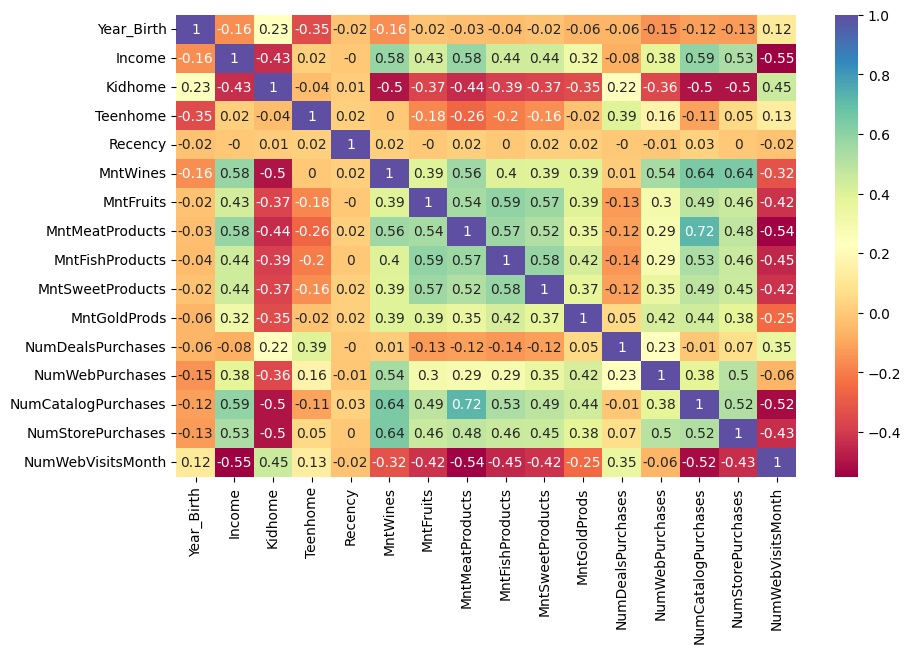

In [ ]:
plt.figure(figsize=(10,6))
sns.heatmap( store_df[numerical_column.columns].corr().round(2), annot =True ,
              cmap="Spectral", cbar= True)
plt.show()

$\underline{\textbf{Conclusions :}}$


Some of the important insights from the heatmap are as follow :
*   A strong correlation exists between **MntWines & Income (corr = 0.58)**  followed by **Income & MntMeatProducts (corr = 0.58)**.


* **Higher income**  customer **prefer NumCatalogPurchases** showing a strong correlation **(corr = 0.59)**.


*   Customers who **spend on wines are more likely to spend on meat product also** with a strong postitive correlation between **MntWines & mntMeatProducts (corr = 0.56)**.


*  Most of the customer prefer to **purchase Wine products** either from **NumCatalogPurchases or NumStorePurchases** showing a strong positive correlation both **(corr = 0.64)**.


*   Customer who spend on **MntFishProducts are more likely to spend on MntFruits also with a positive corelation(corr = 0.59 )**.


* Most customer who purchase **MeatProducts prefer Catalog as a purchasing medium** with a strong correlation between **MntMeatProducts & NumCatalogPurchase (corr = 0.72)**.





### Customer Age Behaviour

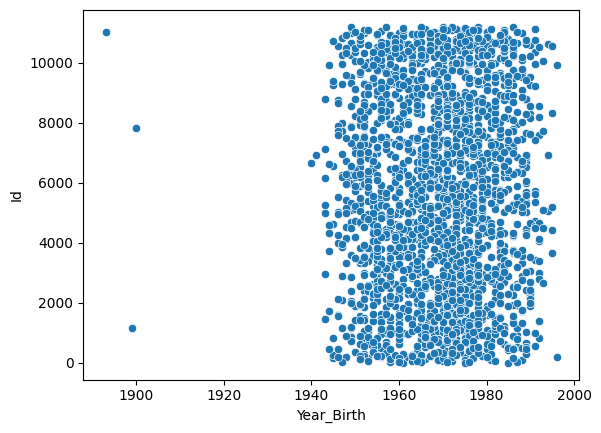

In [ ]:
sns.scatterplot(data=store_df, x = "Year_Birth" , y = "Id")
plt.show()

$\underline{\textbf{Conclusions :}}$

 This shows that the **most of the customer** in the dataset were **born between late 1950 to 1980**. This reveals that the **dataset mainly focussed on the individual who were middle aged or older** .

### Customer Response for campaign

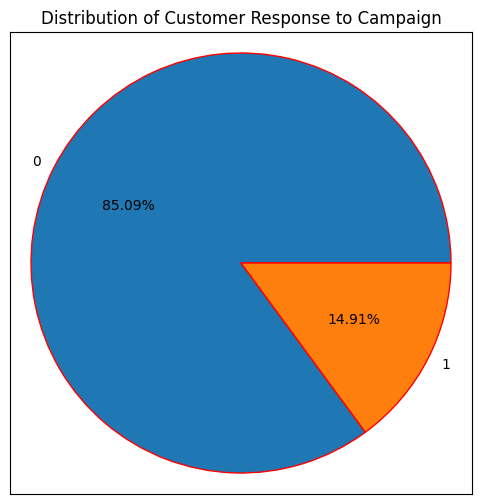

In [ ]:
# Count frequency of each category in response column
Response_Count = store_df["Response"].value_counts()

#plotting the pie chart
plt.figure(figsize=(6,6))
plt.pie(Response_Count ,labels= Response_Count.index, autopct='%2.2f%%', startangle=0 ,
         labeldistance=1.07,frame=True ,wedgeprops={'edgecolor': 'Red'})

# Remove axis ticks
plt.xticks([])  # Remove x-axis ticks
plt.yticks([])  # Remove y-axis ticks

# Add a title
plt.title('Distribution of Customer Response to Campaign')

# Show the plot
plt.show()

$\underline{\textbf{Conclusions :}}$

The above pie plot represents that only a **small chunk of the customer(~ 15%) have responded positively to the campaign while the majority (~85 %) of customer didn't responded to the campaign drive**.



### Customer Income Behaviour

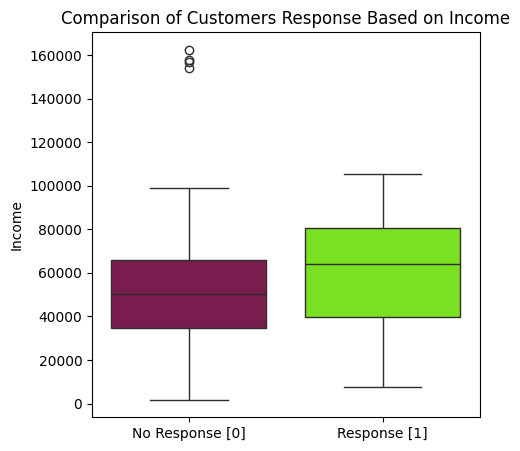

In [ ]:
# Creating a boxplot
fig, ax = plt.subplots(figsize=(5,5))

# "Response " is in store_df dataframe while "Income" without outlieer is in Numerical_column dataframe
sns.boxplot(x=store_df['Response'], y= numerical_column['Income'], ax=ax, palette=['#880E4F', '#76FF03'])




#setting on the title
ax.set_title('Comparison of Customers Response Based on Income', fontsize=12)

ax.set_xticks([0, 1])
ax.set_xticklabels(['No Response [0]', 'Response [1]'])
ax.set_xlabel('')

plt.show()

$\underline{\textbf{Conclusions :}}$

The customer with **lower income shows negative response to the campaign**. However, the customers with middle ranged income showed a positive response to the campaign. It shows that the **campaign seems to be more appealing to the customers ranging from middle to upper income** .

### Customer Education Behaviour

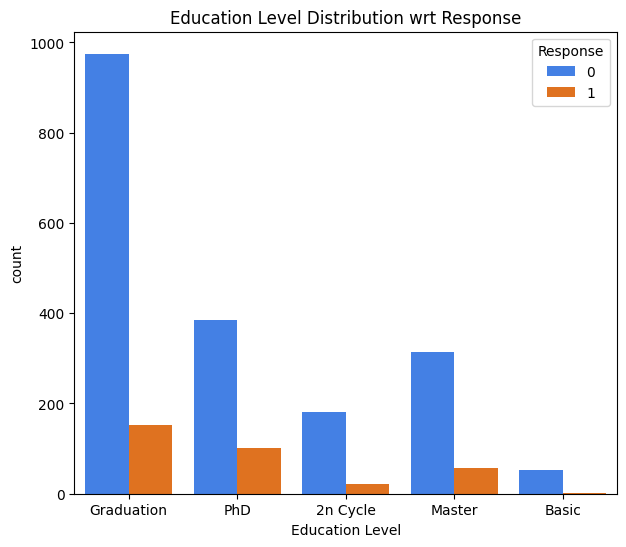

In [ ]:

plt.figure(figsize=(7,6))
sns.countplot(data=store_df, x="Education", hue="Response", palette=['#2979FF', '#FF6D00'])
plt.title('Education Level Distribution wrt Response')
plt.xlabel('Education Level')
plt.show()

$\underline{\textbf{Conclusions :}}$

It reveals that the **customer with graduation degree shows the maximum response to the campaign followed by phd degree** and masters degree. However, **wrt proportion the phd holders accounts for greater response rate followed by masters** and graduation.
This shows a trend that the **customer with a good educational background are more associated with the campaign**.

### Customer Marital Behaviour

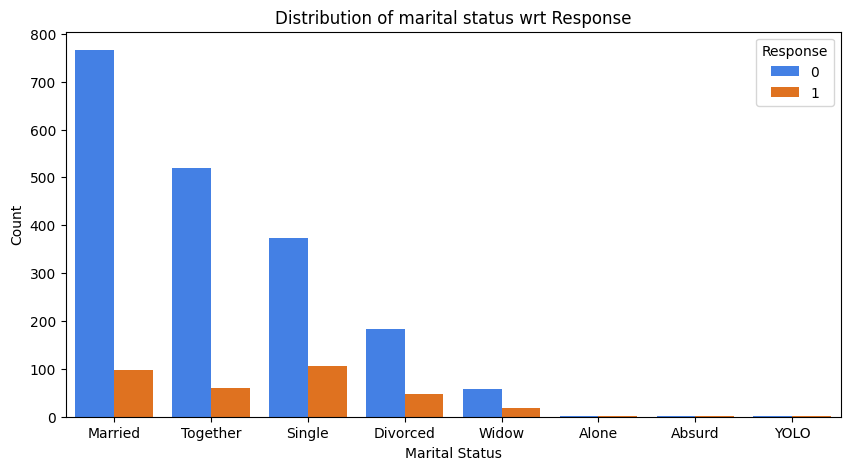

In [ ]:
# Compute counts and sort in descending order
married_count = store_df.groupby(['Marital_Status', 'Response']).size().reset_index(name='Count').sort_values(by='Count', ascending=False)

# Plot the graph
plt.figure(figsize=(10, 5))
sns.barplot(data=married_count, x='Marital_Status', y=married_count['Count'], hue='Response', palette=['#2979FF', '#FF6D00'])

plt.title('Distribution of marital status wrt Response')
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.legend(title='Response')

plt.show()

$\underline{\textbf{Conclusions :}}$

The **customer with marital status as single accounts for maximum response to campaign in terms of both number and proportion** followed by the married customers.

### Customer Complian Behaviour

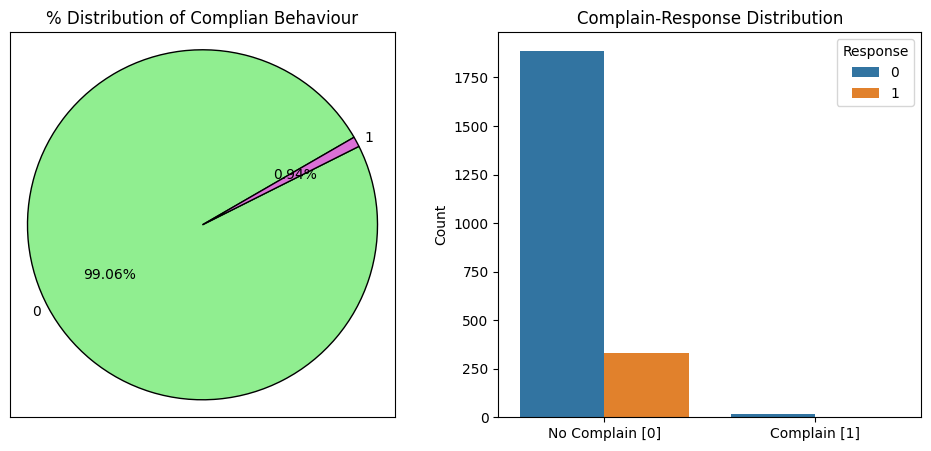

In [ ]:
Complain_Count = store_df["Complain"].value_counts()

#plotting the pie chart

fig, axes =plt.subplots(1,2,figsize=(12,5))
axes[0].pie(Complain_Count ,labels= Complain_Count.index, autopct='%2.2f%%', startangle= 30 ,
         labeldistance=1.05,frame=True ,wedgeprops={'edgecolor': 'Black'} , colors =["lightgreen" , "orchid"])

sns.countplot(store_df,x='Complain',hue= 'Response')

# Remove axis ticks
axes[0].set_xticks([])  # Remove x-axis ticks
axes[0].set_yticks([])  # Remove y-axis ticks

# Add a title
axes[0].set_title('% Distribution of Complian Behaviour')
axes[1].set_title('Complain-Response Distribution')

axes[0]
axes[1].set_ylabel('Count')
axes[1].set_xticks([0, 1])
axes[1].set_xticklabels(['No Complain [0]', 'Complain [1]'])
axes[1].set_xlabel('')

# Show the plot
plt.show()

$\underline{\textbf{Conclusions :}}$

It is evident from the above graphs that a **large majority(~99%) of the customer have not made any complain** to the campaign **nor they have responded positively to the campaign**. This shows that the complain behaviour is very rare in this dataset.**None of the customer who have responded positively to the campaign have made any complain**.

### Customer Recency Behaviour

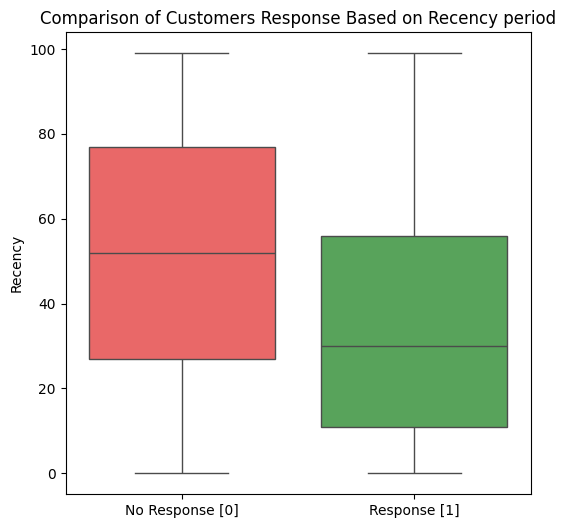

In [ ]:
# Creating a boxplot
fig, ax = plt.subplots(figsize=(6,6))
sns.boxplot(store_df, x='Response', y='Recency', ax=ax, palette=['#FF5252', '#4CAF50'])




#setting on the title
ax.set_title('Comparison of Customers Response Based on Recency period', fontsize=12)

ax.set_xticks([0, 1])
ax.set_xticklabels(['No Response [0]', 'Response [1]'])
ax.set_xlabel('')

plt.show()

$\underline{\textbf{Conclusions :}}$

The above box plot shows that **recency period for positive response is smaller(~25 days)** compared to the **recency period of negative response( ~55 days)**. This shows that the **customer who have not interacted with the company for the long time are less likely to respond positively to the campaign** .

### Customer Product purchase Behaviour

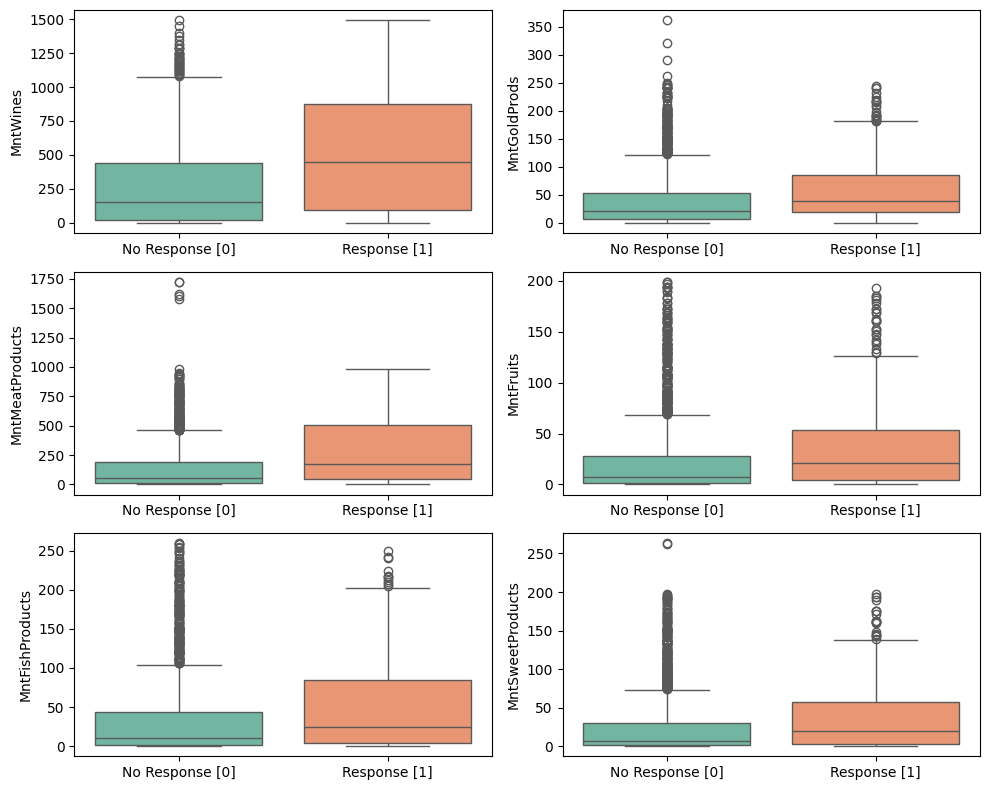

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define product columns
product_df = ["MntWines", "MntGoldProds", "MntMeatProducts", "MntFruits", "MntFishProducts", "MntSweetProducts"]

# Create subplots
fig, axes = plt.subplots(3, 2, figsize=(10, 8))  # 3 rows, 2 columns of subplots
axes = axes.flatten()  # Flatten the array to access axes as a list

# Loop through product columns and plot
for i, variable in enumerate(product_df):
    ax = axes[i]  # Get the correct subplot axis
    sns.boxplot(x=store_df["Response"], y=store_df[variable], palette="Set2",ax=ax)

    # Set x-ticks and labels
    ax.set_xticks([0, 1])
    ax.set_xticklabels(['No Response [0]', 'Response [1]'])

    ax.set_xlabel("")  # Remove x-axis label for a cleaner look

plt.tight_layout()
plt.show()


$\underline{\textbf{Conclusions :}}$

The above plot shows that the **customers who are spending more on any product are more likely to accept the offer** and tends to show a positive response to the campaign .

## **Task 5 : Conclusion and Recommendations**

### Top Id with Max Amount Spend and Transaction

In [ ]:
# Creating two New columns for total amount spend and total purchase made

store_df["Total Amount"] = store_df["MntWines"] + store_df["MntGoldProds"] + store_df["MntMeatProducts"] + store_df["MntFruits"] + store_df["MntFishProducts"] + store_df["MntSweetProducts"]
store_df["Total Purchases"] = store_df["NumWebPurchases"] + store_df["NumCatalogPurchases"] + store_df["NumStorePurchases"]+store_df["NumDealsPurchases"]


In [ ]:
# Top Ids spending the maximum amount representing purchasing power
store_df[['Id', 'Total Amount','Total Purchases']].sort_values(by='Total Amount', ascending=False).reset_index(drop=True).head()

,Id,Total Amount,Total Purchases
0,5350,2525,18
1,5735,2525,18
2,1763,2524,29
3,4580,2486,26
4,4475,2440,25


In [ ]:
# Top id who purchased maximum items representing buying frequency
store_df[['Id', 'Total Purchases','Total Amount']].sort_values(by='Total Purchases', ascending=False).reset_index(drop=True).head()

,Id,Total Purchases,Total Amount
0,1501,44,1717
1,5376,43,1730
2,238,39,1082
3,8475,37,1608
4,7030,35,1485


$\underline{\textbf{Conclusions :}}$



*   The Customer with **ID 5350 and 5735 have spend the maximum amount of 2525
units indicating high-value customer** with only 18 transcations followed by customer having ID 1763 spending 2524 units with 29 transcations.Customer with **ID 1763 made 29 purchases with 2524 total spending, implying frequent small transactions**.


*  The customer with **ID: 1501 made 44 purchases, spending 1717 in total, indicating a frequent shopper with high engagement**.
*  Most of the **Customers are making 32–35 purchases  and tend to spend between 900 and 1200 units**.This shows the **customers are regular but have a moderate spending nature** .




$\underline{\textbf{Recommendations :}}$



*   **Loyalty Program for High Spenders** :Offer exclusive discounts or membership benefits for high value customers spending above 2000 to retain them.
*   **Promotions for Frequent Buyers** :Customers with high purchase frequency but moderate spending (e.g., ID 1763) should be encouraged to increase their basket size with bundle offers.


*  **Increase Spending per Transaction** :Introduce minimum spend discounts (e.g., "Spend 2000 and get 10% off") to push mid-tier customers into higher spending brackets.





### Income vs Spending Nature

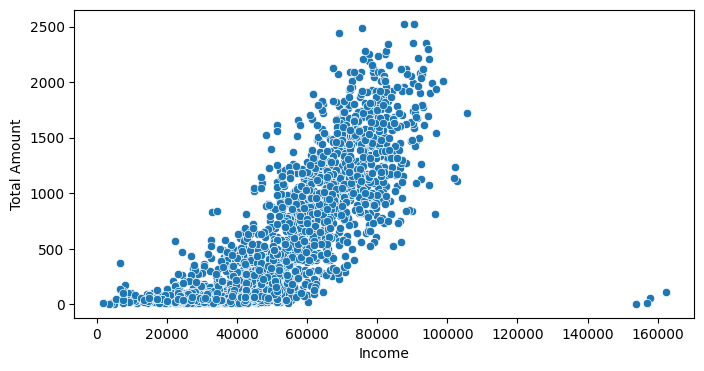

In [ ]:
plt.figure(figsize=(8,4))
sns.scatterplot( y = store_df["Total Amount"] , x = numerical_column["Income"])
plt.show()

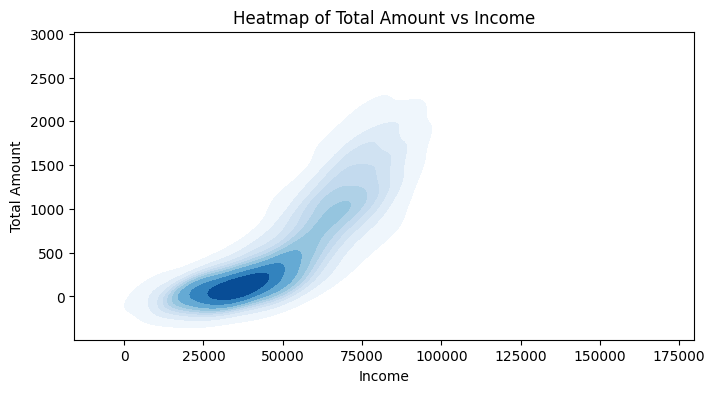

In [ ]:
# Hetamap for Income vs Total Amount

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 4))

# Generate a heatmap (density plot) for Income vs Total Amount
sns.kdeplot(x=numerical_column["Income"], y=store_df["Total Amount"], cmap="Blues", fill=True)

plt.xlabel("Income")
plt.ylabel("Total Amount")
plt.title("Heatmap of Total Amount vs Income")
plt.show()


$\underline{\textbf{Conclusions :}}$



* **Income between 20k-60k** : Most of the customer in this income range has a total amount spend in a very narrow range amounting between 100-500 units.
*   **Income above 60K** : There is a significant difference between spending power for customers with higher income .The total amount spent has a broder range between 500-2000 units .

$\underline{\textbf{Recommendations :}}$

*   **Budget-Conscious Buyers** : Introduce "Value Packs" , Bundle Deals , cashback on digital payements , EMI schemes to encourage slightly higher spending .
*   **High-Spending Buyers** : Introduce "**Limited Edition" high-value product** lines targeting their spending behavior.





### Popular sales Channel

In [ ]:
sales_channel =store_df[['NumDealsPurchases' ,'NumWebPurchases' ,'NumCatalogPurchases' ,'NumStorePurchases']].sum()
sales_channel_df = sales_channel.reset_index().rename(columns={"index": "Sales Channel", 0: "Total Sales"})

In [ ]:
sales_channel_df

,Sales Channel,Total Sales
0,NumDealsPurchases,5208
1,NumWebPurchases,9150
2,NumCatalogPurchases,5963
3,NumStorePurchases,12970


<Axes: xlabel='Sales Channel', ylabel='Total Sales'>

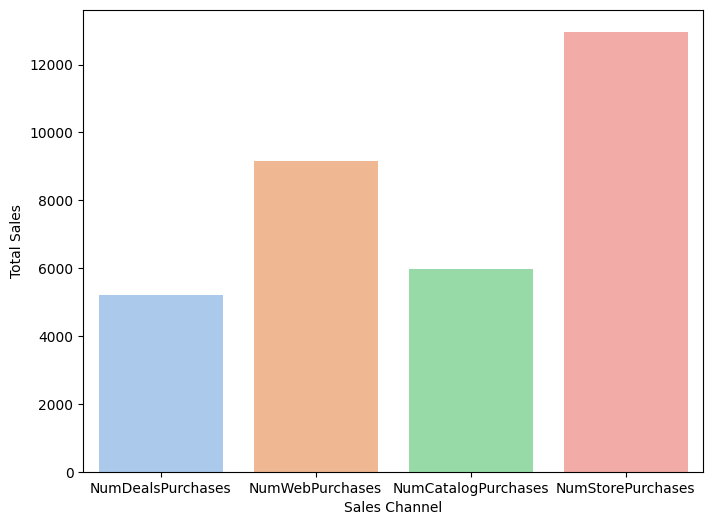

In [ ]:
plt.figure(figsize=(8, 6))
sns.barplot(x="Sales Channel", y="Total Sales", data=sales_channel_df, palette="pastel")

$\underline{\textbf{Conclusions :}}$

The **store purchase is the most preferred sales channel(~40% traffic)** followed by the web purchase while the **deal based purchase is the least preferred** medium.

$\underline{\textbf{Recommendations :}}$



*  **Leverage In-Store Engagement** : Improve customer service , instore experience and timely  organise in-store events to maintain the customer traffic as it is the most preffered channel.
*  **Promote other channels with deal based purchase** :Encourage customers to **"Buy Online, Pick Up In-Store"** for added convenience while **offering "Buy More, Save More" deals** to incentivize larger purchases, **driving both online engagement and in-store experience**.


###kidsHome vs Spending Nature

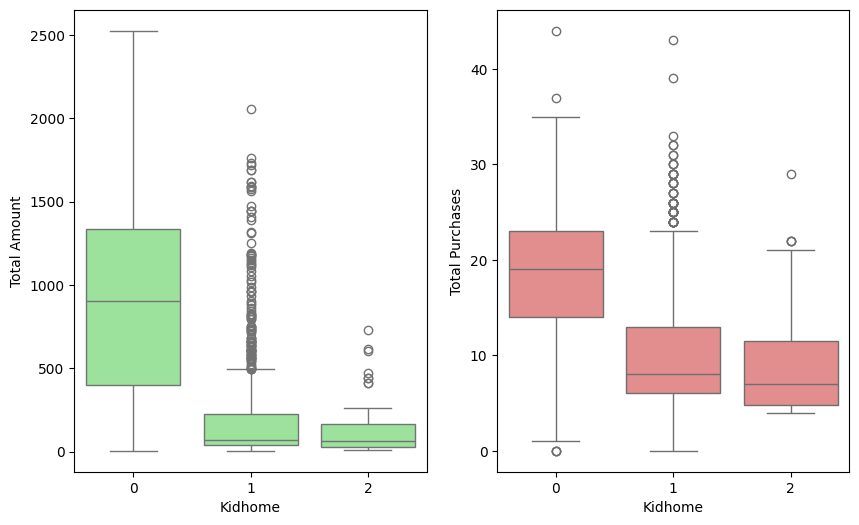

In [ ]:
# how presence of kids influence the spending nature

Total_value = ["Total Amount","Total Purchases"]
fig, axes = plt.subplots(1, 2, figsize=(10, 6))  # 3 rows, 2 columns of subplots
axes = axes.flatten()
colors = ["lightgreen", "lightcoral"]

for i,variable in enumerate(Total_value):
  ax = axes[i]
  sns.boxplot(x=store_df["Kidhome"],y=store_df[variable],ax=ax,color=colors[i])
plt.show()

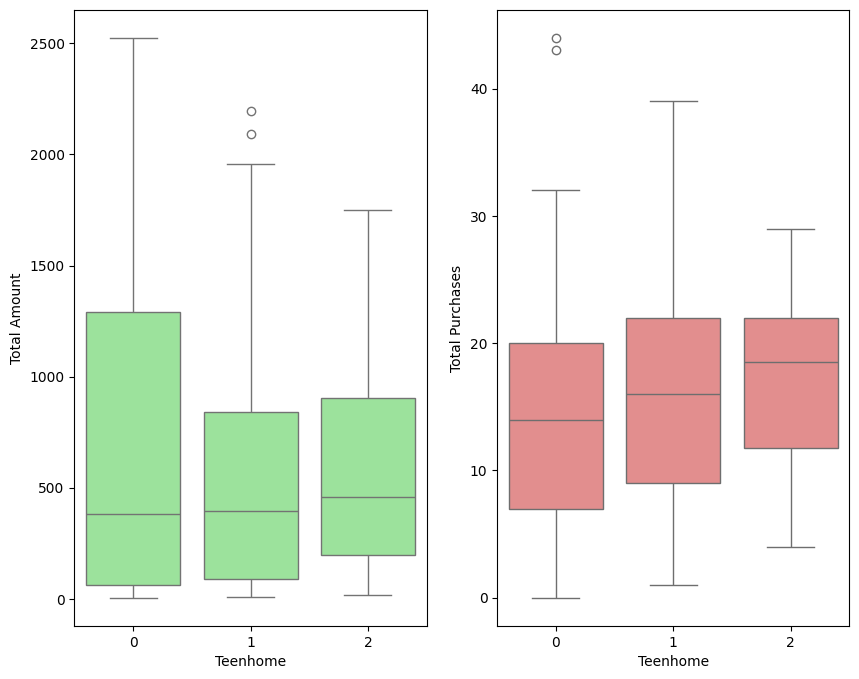

In [ ]:
#How presence of Teens influence the spending Nature

Total_value = ["Total Amount","Total Purchases"]
fig, axes = plt.subplots(1, 2, figsize=(10, 8))  # 3 rows, 2 columns of subplots
axes = axes.flatten()
colors = ["lightgreen", "lightcoral"]

for i,variable in enumerate(Total_value):
  ax = axes[i]
  sns.boxplot(x=store_df["Teenhome"],y=store_df[variable],ax=ax,color=colors[i])
plt.show()

$\underline{\textbf{Conclusions :}}$



* It is very clear that **customers having no kids at home have the maximum
spending power along with highest purchasing frequency** .As number of kids increases both spending and purchasing frequency keep on decreasing .

*   There is **no significant change in the total amount spend** due to presence of teens but the **purchasing frequency keep on increasing with the number of teens at home**.


$\underline{\textbf{Recommendations :}}$



*  **Offers for Customers with Kids** :Introduce "Buy Now, Pay Later"  options for customers withs kids to enhance sales.
*  **Teen centric promotions** : Introduce "Share your purchase on social media to win cashback" type promotion offer as teen are the frequent purchasers .





### Educational background vs Spending Nature

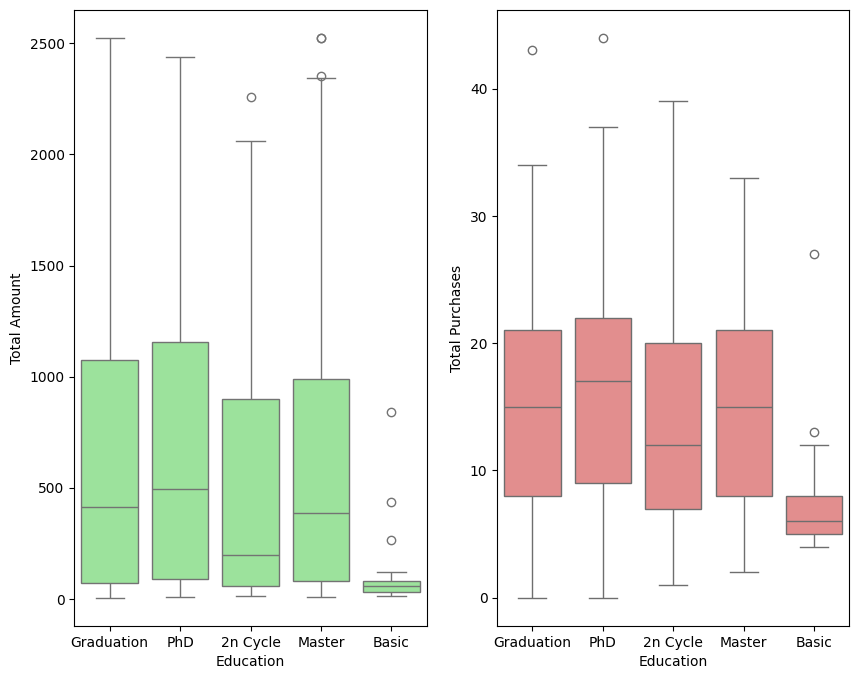

In [ ]:
# How educational background influence purchasing behaviour
Total_value = ["Total Amount","Total Purchases"]
fig, axes = plt.subplots(1, 2, figsize=(10, 8))  # 3 rows, 2 columns of subplots
axes = axes.flatten()
colors = ["lightgreen", "lightcoral"]

for i,variable in enumerate(Total_value):
  ax = axes[i]
  sns.boxplot(x=store_df["Education"],y=store_df[variable],ax=ax,color=colors[i])
plt.show()

$\underline{\textbf{Conclusions :}}$

It is clear from above boxplot that the **customers with phd degree have a greater expenditure as well transaction for different items followed by graduation and masters degree** while the customer with basic degree spend the least both in terms of amount and transaction. \\
It can be concluded that **customers with good educational background tend to spend more** compared to the customers with basic education levels.

$\underline{\textbf{Recommendations :}}$



*   **Targeted Digital Marketing** : Use AI-driven recommendations , email campaigns, social network with exclusive offers based on the spending pattern  so as to spread the word of mouth through professional communit.
*   **Budget-Friendly Promotions** : Offer low-cost introductory products or trial packs to encourage spending along with EMIU schemes so that in order to lure the customers with basic educational qualifications.



### Marital status vs Spending Nature

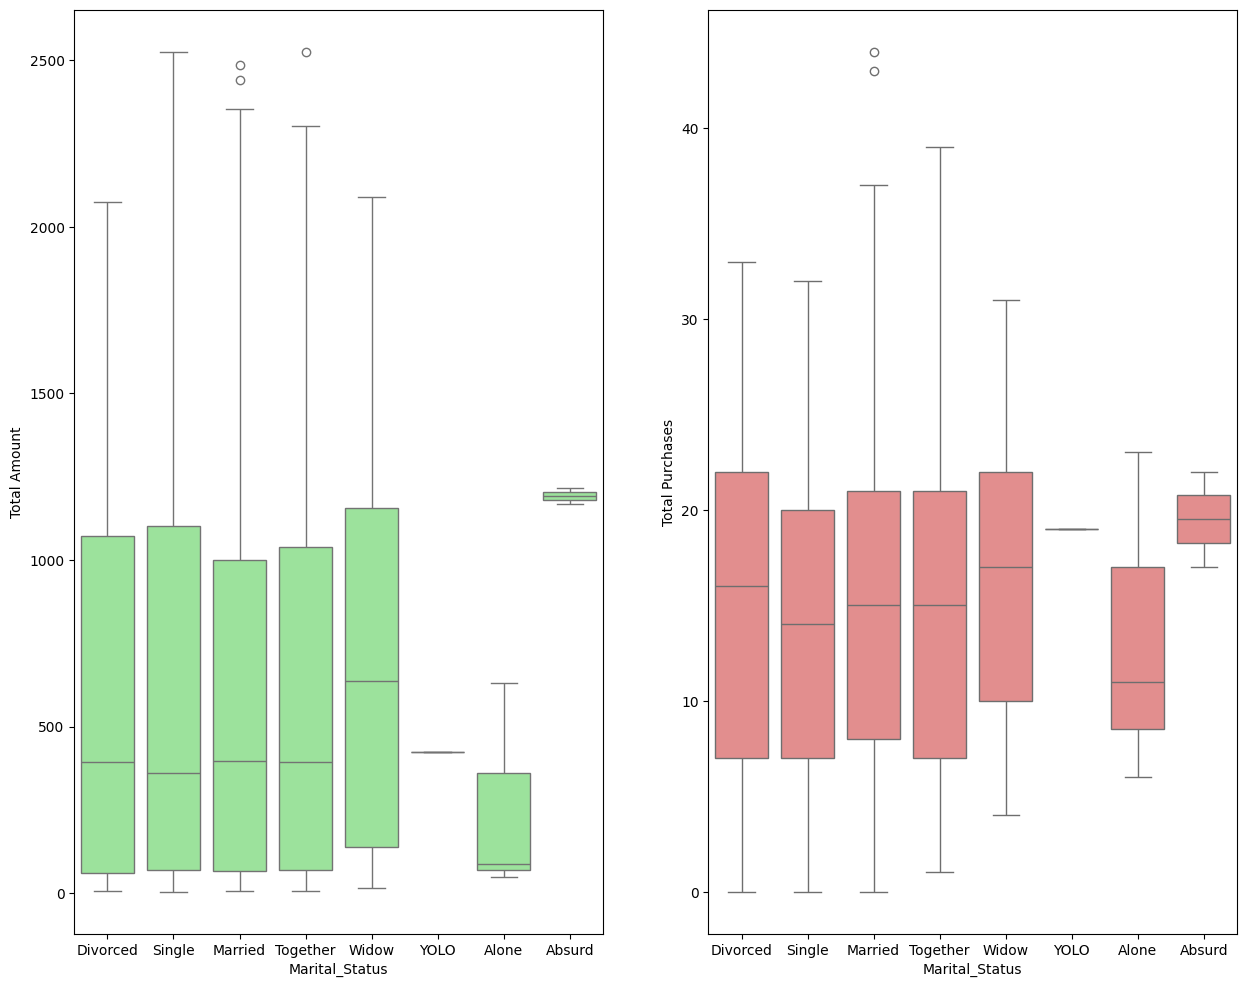

In [ ]:
#How the marital status influence the spending nature
Total_value = ["Total Amount","Total Purchases"]
fig, axes = plt.subplots(1, 2, figsize=(15, 12))  # 3 rows, 2 columns of subplots
axes = axes.flatten()
colors = ["lightgreen", "lightcoral"]

for i,variable in enumerate(Total_value):
  ax = axes[i]
  sns.boxplot(x=store_df["Marital_Status"],y=store_df[variable],ax=ax,color=colors[i])
plt.show()

$\underline{\textbf{Conclusions :}}$


*  The **customer with marital status Widow have the maximum purchasing power as the purchasing frequency** .
*   There is **no significnat differernce between spending power of customers having status as single, divorced, married and together** .


$\underline{\textbf{Recommendations :}}$

*    **Segment-Based Discount Strategies** : Offer lifestyle-based personalized promotions to customers with various relationship status such as Weekend Couple Deals" for Married/Together customers or "Solo Shopper Savings" for Singles to enhance sales growth .


